In [ ]:
!pip install arch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas_datareader.data as web
import yfinance as yf

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Date range and stock

symbol = 'SPY'
start_date = '2000-01-01'
end_date = '2024-01-01'

#Data import

df = yf.download(symbol, start=start_date, end=end_date)

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                 Open       High         Low     Close  Adj Close    Volume
Date                                                                       
2000-01-03  148.25000  148.25000  143.875000  145.4375  93.881927   8164300
2000-01-04  143.53125  144.06250  139.640625  139.7500  90.210594   8089800
2000-01-05  139.93750  141.53125  137.250000  140.0000  90.371948  12177900
2000-01-06  139.62500  141.50000  137.750000  137.7500  88.919571   6227200
2000-01-07  140.31250  145.75000  140.062500  145.7500  94.083618   8066500


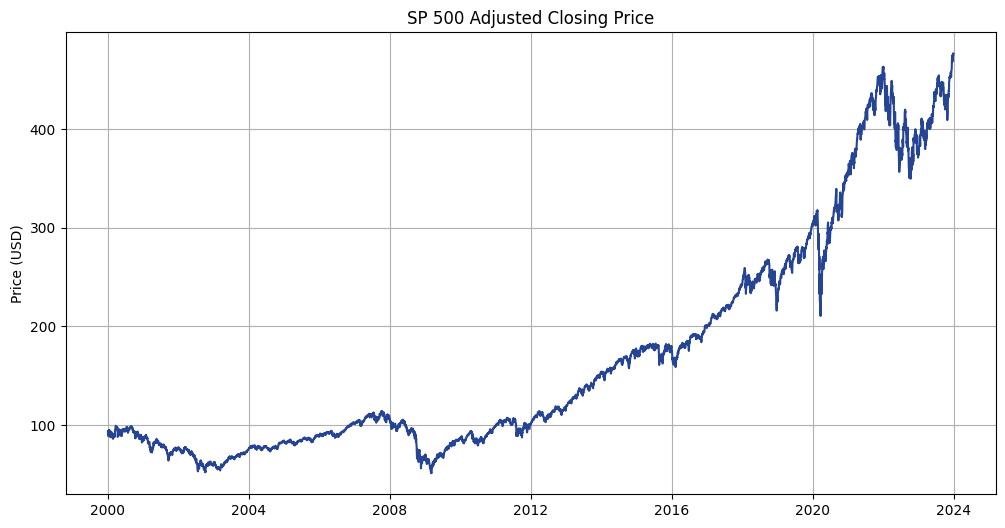

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(df['Adj Close'], color='#254494')
plt.title('SP 500 Adjusted Closing Price')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

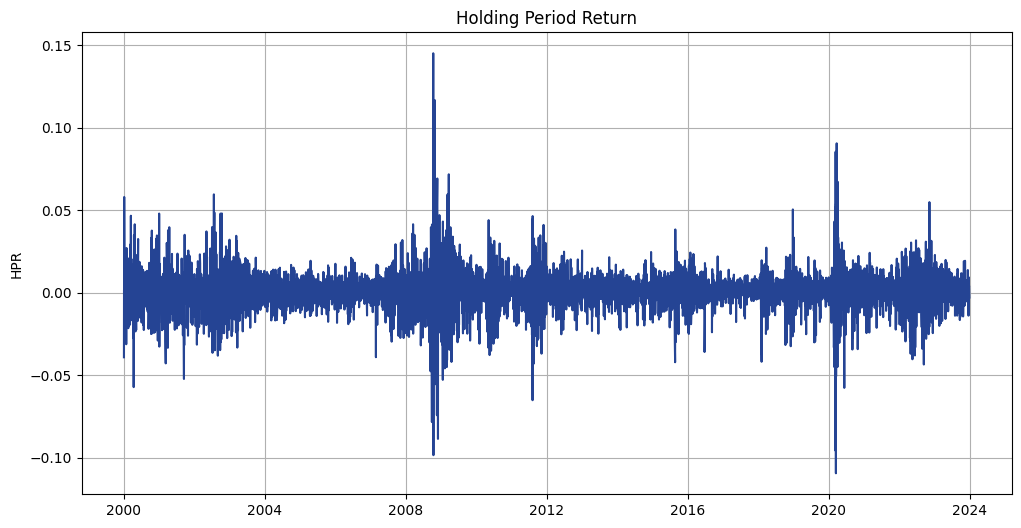

In [ ]:
#Calculate Holding Period Return (HPR)

df['Return'] = df['Adj Close'].pct_change()

#Remove the first row since it will have NaN value
df = df[1:]

#Plot HPR

plt.figure(figsize = (12, 6))
plt.plot(df['Return'], color = '#254494')
plt.title('Holding Period Return')
plt.ylabel('HPR')
plt.grid(True)
plt.show()

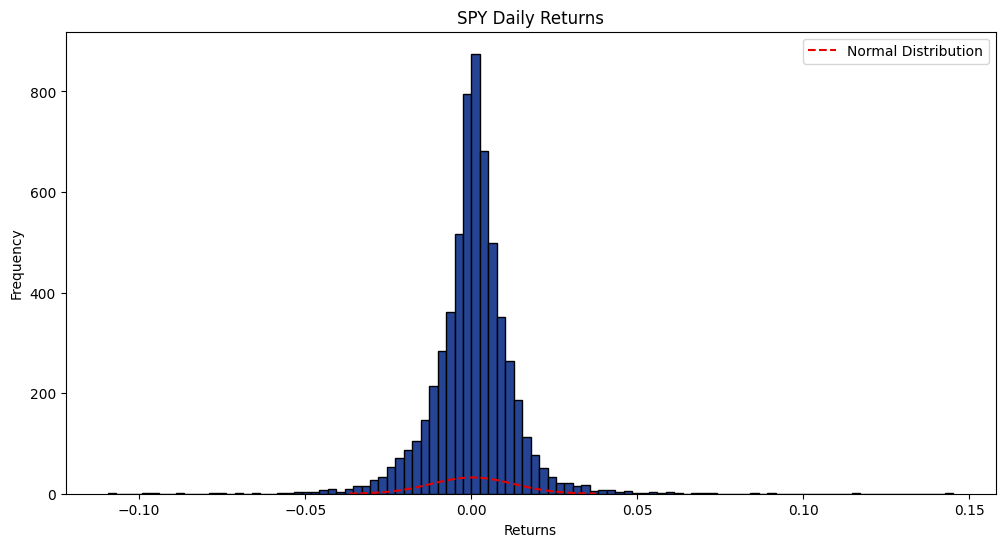

In [ ]:
# Visualize the distribution of returns
plt.figure(figsize=(12, 6))
plt.hist(df['Return'], bins=100, edgecolor='black', color='#254494')
mu, sigma = np.mean(df['Return']), np.std(df['Return'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='#e60000', linestyle='--', label='Normal Distribution')
plt.title('SPY Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import yfinance as yf  # You may need to install yfinance: pip install yfinance

# Download SPY data from Yahoo Finance
spy_data = yf.download('SPY', start='2000-01-01', end='2024-01-01')

# Extract daily closing prices
spy_close = spy_data['Adj Close'].pct_change()

# Calculate descriptive statistics
total_stats = pd.DataFrame({
    'Total Data (2000-2024)': [
        spy_close.mean() *100,
        spy_close.median() *100,
        spy_close.std() *100,
        spy_close.skew(),
        spy_close.kurtosis()
    ]
}, index=['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'])

# Filter data for market distress periods
distress_2008_2009 = spy_close['2008-01-01':'2009-12-31']
distress_2020 = spy_close['2020-01-01':'2020-12-31']

# Calculate descriptive statistics for market distress periods
distress_stats = pd.DataFrame({
    'Market Distress Periods': [
        distress_2008_2009.mean() * 100,
        distress_2008_2009.median() * 100,
        distress_2008_2009.std() * 100,
        distress_2008_2009.skew(),
        distress_2008_2009.kurtosis()
    ],
    '2020': [
        distress_2020.mean() *100,
        distress_2020.median() *100,
        distress_2020.std() *100,
        distress_2020.skew(),
        distress_2020.kurtosis()
    ],

}, index=['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'])

# Concatenate total and distress period statistics
descriptive_statistics = pd.concat([total_stats, distress_stats], axis=1)

# Print the descriptive statistics table
print(descriptive_statistics)


[*********************100%%**********************]  1 of 1 completed

                    Total Data (2000-2024)  Market Distress Periods      2020
Mean                              0.034520                -0.020652  0.088811
Median                            0.065454                 0.060343  0.225993
Standard Deviation                1.236162                 2.191180  2.103875
Skewness                         -0.007855                 0.418063 -0.607845
Kurtosis                         11.463228                 7.128285  7.325859


In [ ]:
# Test for normality using Shapiro-Wilk test
shapiro_test = stats.shapiro(df['Return'])
print("Shapiro-Wilk test p-value:", shapiro_test[1])

from scipy.stats import kstest

# Assuming 'spy_data' is your DataFrame containing the SPY data

# Extracting SPY data
spy_data_values = spy_data['Close'].values

# Performing the Kolmogorov-Smirnov test for normality
ks_statistic, ks_p_value = kstest(spy_data_values, 'norm')

# Printing the test results
print("Kolmogorov-Smirnov Test Results:")
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")


Shapiro-Wilk test p-value: 0.0
Kolmogorov-Smirnov Test Results:
KS Statistic: 1.0
P-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# Test for normality using Anderson-Darling test
anderson_test = stats.anderson(df['Return'], dist='norm')
print("Anderson-Darling test statistic:", anderson_test.statistic)
print("Anderson-Darling test critical values:", anderson_test.critical_values)
print("Anderson-Darling test significance levels:", anderson_test.significance_level)

Anderson-Darling test statistic: 113.25031387862327
Anderson-Darling test critical values: [0.576 0.656 0.786 0.917 1.091]
Anderson-Darling test significance levels: [15.  10.   5.   2.5  1. ]


In [ ]:
# Fit Gaussian distribution
mean, std = stats.norm.fit(df['Return'])
print("Gaussian Distribution Parameters:")
print("Mean:", mean)
print("Standard Deviation:", std)

# Fit Student's t distribution
params = stats.t.fit(df['Return'])
print("\nStudent's t Distribution Parameters:")
print("Degrees of Freedom:", params[0])
print("Location:", params[1])
print("Scale:", params[2])

Gaussian Distribution Parameters:
Mean: 0.00034519630279892903
Standard Deviation: 0.012360593119212188

Student's t Distribution Parameters:
Degrees of Freedom: 2.6575353008825835
Location: 0.0007400621621115437
Scale: 0.00716654562114495


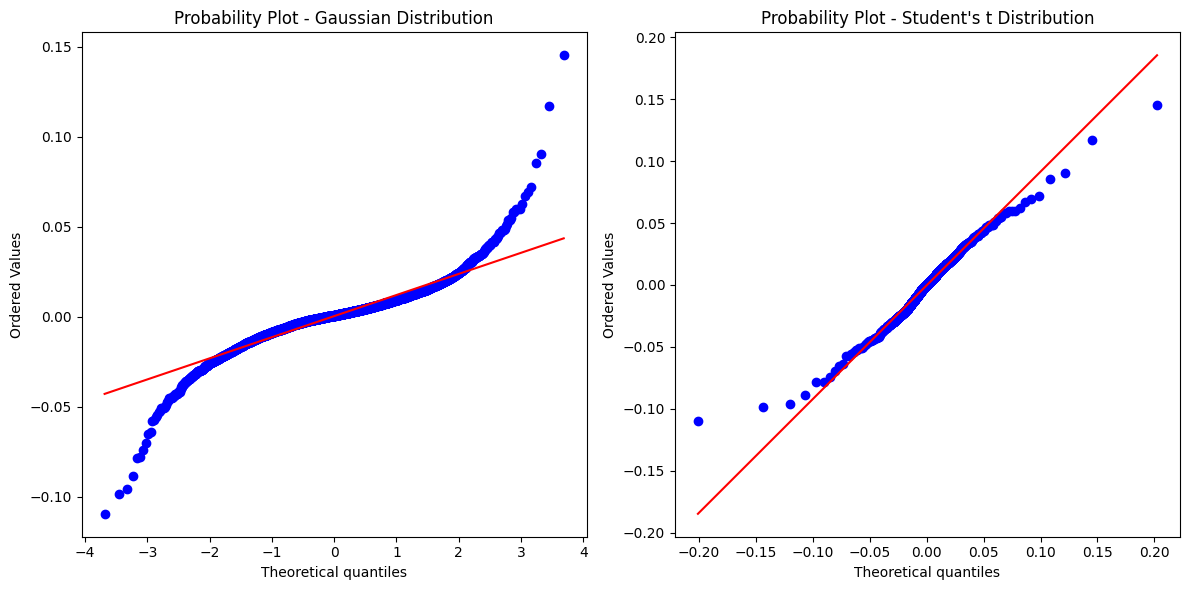

In [ ]:
# Generate probability plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(df['Return'], dist='norm', plot=plt)
plt.title('Probability Plot - Gaussian Distribution')

plt.subplot(1, 2, 2)
stats.probplot(df['Return'], dist='t', sparams=params, plot=plt)
plt.title("Probability Plot - Student's t Distribution")

plt.tight_layout()
plt.show()

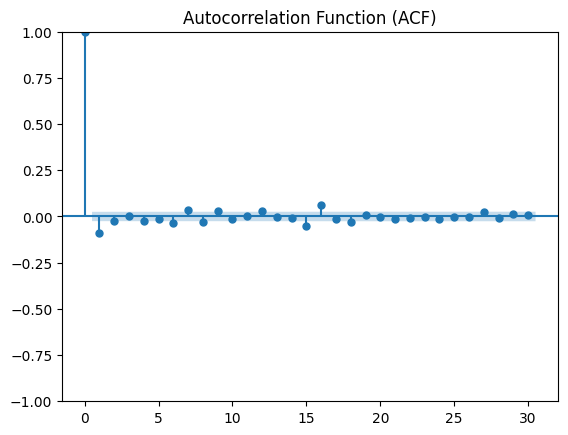

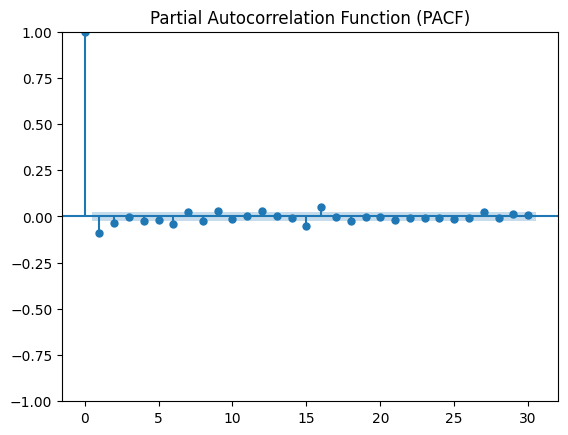

In [ ]:
# Autocorrelation analysis
plot_acf(df['Return'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['Return'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
arima_model = ARIMA(df['Return'], order=(1, 0, 0))
arima_result = arima_model.fit()
print(arima_result.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Return   No. Observations:                 6036
Model:                 ARIMA(1, 0, 0)   Log Likelihood               17976.186
Date:                Fri, 15 Mar 2024   AIC                         -35946.372
Time:                        23:14:37   BIC                         -35926.256
Sample:                             0   HQIC                        -35939.389
                               - 6036                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      2.300      0.021    5.06e-05       0.001
ar.L1         -0.0876      0.007    -13.113      0.000      -0.101      -0.075
sigma2         0.0002    1.1e-06    137.407      0.0

In [ ]:
# GARCH model
garch_model = arch_model(df['Return'], vol='GARCH', p=1, q=1)
garch_result = garch_model.fit(disp='off')
print(garch_result.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4335.16
Distribution:                  Normal   AIC:                          -8662.33
Method:            Maximum Likelihood   BIC:                          -8635.50
                                        No. Observations:                 6036
Date:                Fri, Mar 15 2024   Df Residuals:                     6035
Time:                        23:14:37   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1168  1.215e-03     96.199      0.000 [  0.114,  0.11

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001528. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


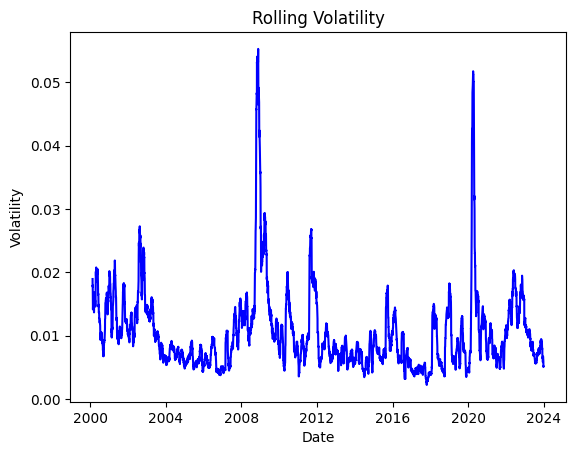

In [ ]:
# Volatility clustering
rolling_volatility = df['Return'].rolling(window=30).std()
plt.plot(rolling_volatility, color='b')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

In [ ]:
# Example code for event study analysis
# Define event window
event_start_date = '2008-01-01'
event_end_date = '2009-12-31'

# Filter data for the event window
event_window_data = df[(df.index >= event_start_date) & (df.index <= event_end_date)]

<ipython-input-113-e167eefc8b5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['Event_Returns'] = event_window_data['Adj Close'].pct_change()


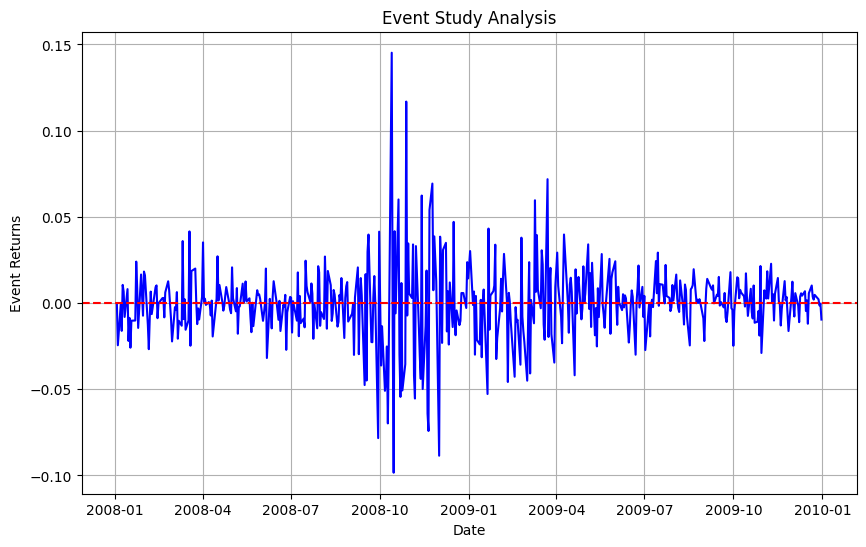

One-sample t-test:
t-statistic: -0.19404777578968366
p-value: 0.8462168135438056


In [ ]:
# Compute event returns (e.g., using arithmetic returns)
event_window_data['Event_Returns'] = event_window_data['Adj Close'].pct_change()

# Perform statistical testing (e.g., t-test for mean event returns)
from scipy.stats import ttest_1samp

# Example: perform a one-sample t-test to compare event returns to the expected return (e.g., 0)
t_stat, p_value = ttest_1samp(event_window_data['Event_Returns'].dropna(), 0)

# Visualize the results (e.g., plot event returns)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(event_window_data.index, event_window_data['Event_Returns'], color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Event Study Analysis')
plt.xlabel('Date')
plt.ylabel('Event Returns')
plt.grid(True)
plt.show()

# Output statistical test results
print("One-sample t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


In [ ]:
# Define event window
event_start_date = '2008-01-01'
event_end_date = '2009-12-31'

# Filter data for the event window
event_window_data = df[(df.index >= event_start_date) & (df.index <= event_end_date)]

# Calculate market returns during the event window
event_window_returns = event_window_data['Return']

# Calculate the mean and standard deviation of market returns during the event window
mean_return = event_window_returns.mean()
std_return = event_window_returns.std()

# Calculate abnormal returns
event_window_data['Abnormal_Returns'] = event_window_returns - mean_return

# Calculate cumulative abnormal returns (CAR)
event_window_data['CAR'] = event_window_data['Abnormal_Returns'].cumsum()

# Analyze trading volumes during the event window
event_window_volumes = event_window_data['Volume']

# Print summary statistics
print("Summary Statistics for Event Window:")
print("Mean Return:", mean_return)
print("Standard Deviation of Return:", std_return)

Summary Statistics for Event Window:
Mean Return: -0.00020651706169914845
Standard Deviation of Return: 0.021911802459719434


<ipython-input-126-2ed96d6c2a28>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['Abnormal_Returns'] = event_window_returns - mean_return
<ipython-input-126-2ed96d6c2a28>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['CAR'] = event_window_data['Abnormal_Returns'].cumsum()


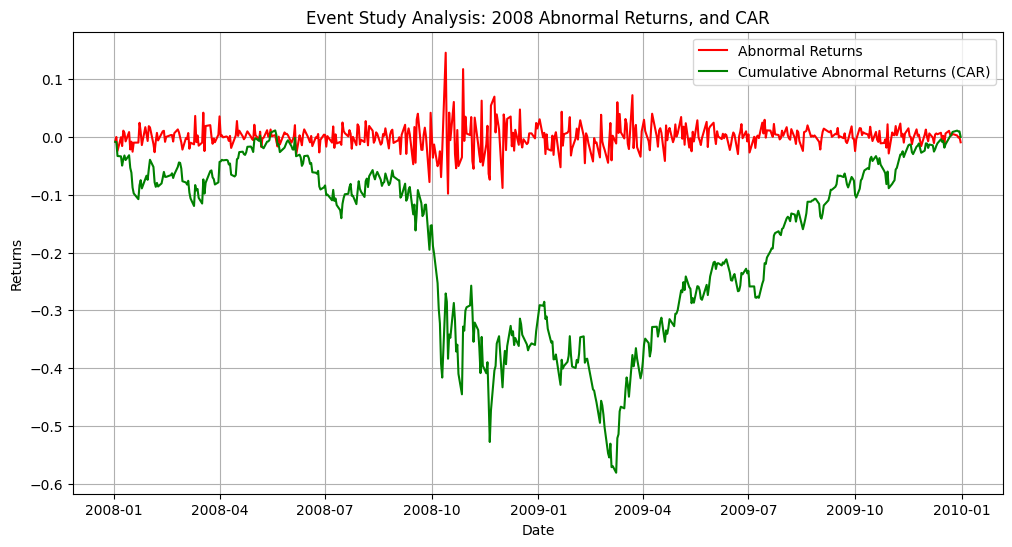

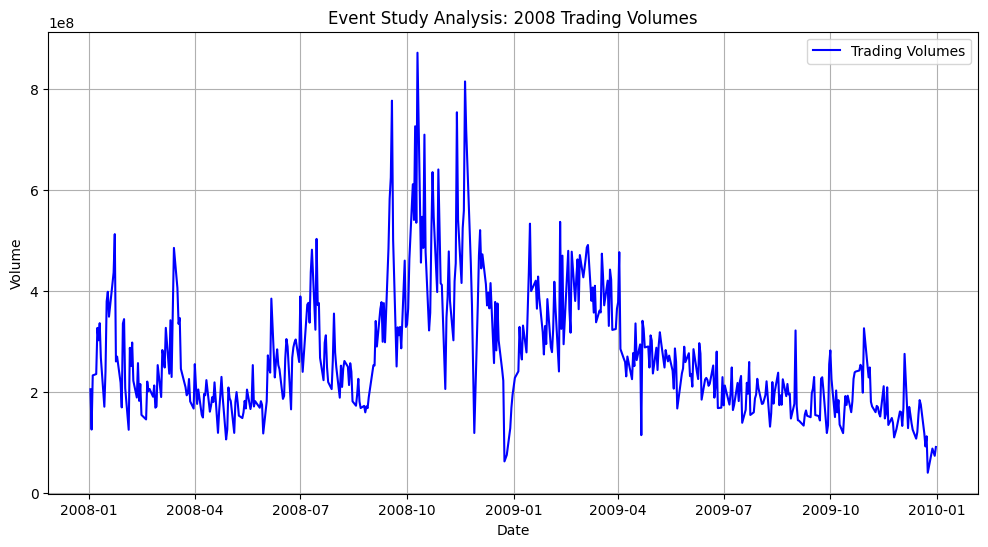

In [ ]:
import matplotlib.pyplot as plt

# Plot market returns, abnormal returns, and cumulative abnormal returns (CAR)
plt.figure(figsize=(12, 6))
plt.plot(event_window_data.index, event_window_data['Abnormal_Returns'], label='Abnormal Returns', color='r')
plt.plot(event_window_data.index, event_window_data['CAR'], label='Cumulative Abnormal Returns (CAR)', color='g')
plt.title('Event Study Analysis: 2008 Abnormal Returns, and CAR')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot trading volumes
plt.figure(figsize=(12, 6))
plt.plot(event_window_data.index, event_window_data['Volume'], label='Trading Volumes', color='b')
plt.title('Event Study Analysis: 2008 Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import wilcoxon

# Extract the Cumulative Abnormal Returns (CAR) values
car_values = event_window_data['CAR']

# Perform the Wilcoxon signed-rank test
w_stat, p_value = wilcoxon(car_values)

# Print the test statistic and p-value
print("Wilcoxon Signed-Rank Test:")
print("Test Statistic:", w_stat)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("The null hypothesis (median CAR = 0) is rejected. There is significant evidence that the median CAR is not zero.")
else:
    print("The null hypothesis (median CAR = 0) cannot be rejected. There is no significant evidence that the median CAR is not zero.")


Wilcoxon Signed-Rank Test:
Test Statistic: 175.0
p-value: 5.459574792733377e-84
The null hypothesis (median CAR = 0) is rejected. There is significant evidence that the median CAR is not zero.


In [ ]:
# Assuming you have a DataFrame named 'spy_data' containing SPY data from 2000-01-01 to 2024-01-01

# Filter data for the periods 2000-2010 and 2010-2024
spy_data_2000_2010 = spy_data[(spy_data.index >= '2000-01-01') & (spy_data.index < '2010-01-01')]
spy_data_2010_2024 = spy_data[(spy_data.index >= '2010-01-01') & (spy_data.index < '2024-01-01')]

# Calculate the worst loss in each period
worst_loss_2000_2010 = (spy_data_2000_2010['Adj Close'].min() - spy_data_2000_2010['Adj Close'].max()) / spy_data_2000_2010['Adj Close'].max() * 100
worst_loss_2010_2024 = (spy_data_2010_2024['Adj Close'].min() - spy_data_2010_2024['Adj Close'].max()) / spy_data_2010_2024['Adj Close'].max() * 100

print("Worst Loss in the period 2000-2010: {:.2f}%".format(worst_loss_2000_2010))
print("Worst Loss in the period 2010-2024: {:.2f}%".format(worst_loss_2010_2024))


Worst Loss in the period 2000-2010: -55.19%
Worst Loss in the period 2010-2024: -83.37%


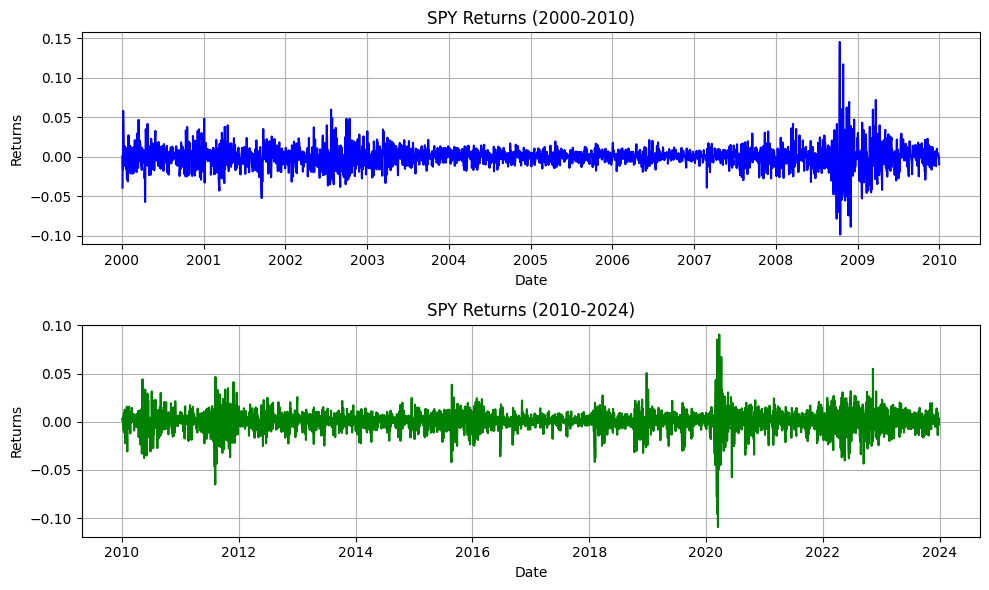

In [ ]:
import matplotlib.pyplot as plt

# Calculate the returns for the periods 2000-2010 and 2010-2024
returns_2000_2010 = spy_data_2000_2010['Close'].pct_change().dropna()
returns_2010_2024 = spy_data_2010_2024['Close'].pct_change().dropna()

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(returns_2000_2010, color='blue')
plt.title('SPY Returns (2000-2010)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(returns_2010_2024, color='green')
plt.title('SPY Returns (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-119-0367e11f3b3d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['Event_Returns'] = event_window_data['Adj Close'].pct_change()


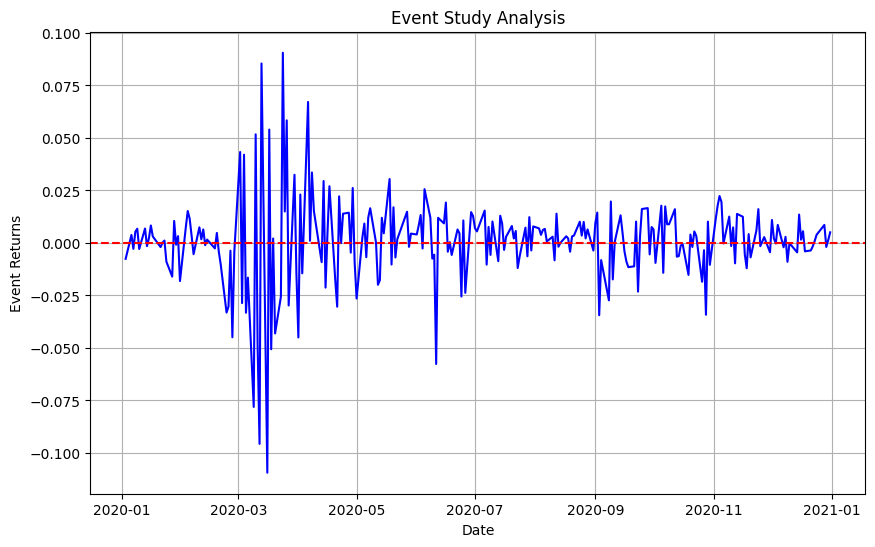

One-sample t-test:
t-statistic: 0.6436961165531847
p-value: 0.5203602130713845


In [ ]:
# Define event window
event_start_date = '2020-01-01'
event_end_date = '2020-12-31'

# Filter data for the event window
event_window_data = df[(df.index >= event_start_date) & (df.index <= event_end_date)]

# Compute event returns (e.g., using arithmetic returns)
event_window_data['Event_Returns'] = event_window_data['Adj Close'].pct_change()

# Perform statistical testing (e.g., t-test for mean event returns)
from scipy.stats import ttest_1samp

# Example: perform a one-sample t-test to compare event returns to the expected return (e.g., 0)
t_stat, p_value = ttest_1samp(event_window_data['Event_Returns'].dropna(), 0)

# Visualize the results (e.g., plot event returns)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(event_window_data.index, event_window_data['Event_Returns'], color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Event Study Analysis')
plt.xlabel('Date')
plt.ylabel('Event Returns')
plt.grid(True)
plt.show()

# Output statistical test results
print("One-sample t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

In [ ]:
# Define event window
event_start_date = '2020-01-01'
event_end_date = '2020-12-31'

# Filter data for the event window
event_window_data = df[(df.index >= event_start_date) & (df.index <= event_end_date)]

# Calculate market returns during the event window
event_window_returns = event_window_data['Return']

# Calculate the mean and standard deviation of market returns during the event window
mean_return = event_window_returns.mean()
std_return = event_window_returns.std()

# Calculate abnormal returns
event_window_data['Abnormal_Returns'] = event_window_returns - mean_return

# Calculate cumulative abnormal returns (CAR)
event_window_data['CAR'] = event_window_data['Abnormal_Returns'].cumsum()

# Analyze trading volumes during the event window
event_window_volumes = event_window_data['Volume']

# Print summary statistics
print("Summary Statistics for Event Window:")
print("Mean Return:", mean_return)
print("Standard Deviation of Return:", std_return)

Summary Statistics for Event Window:
Mean Return: 0.0008881093414214313
Standard Deviation of Return: 0.021038748433922453


<ipython-input-120-c6f523651b84>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['Abnormal_Returns'] = event_window_returns - mean_return
<ipython-input-120-c6f523651b84>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_window_data['CAR'] = event_window_data['Abnormal_Returns'].cumsum()


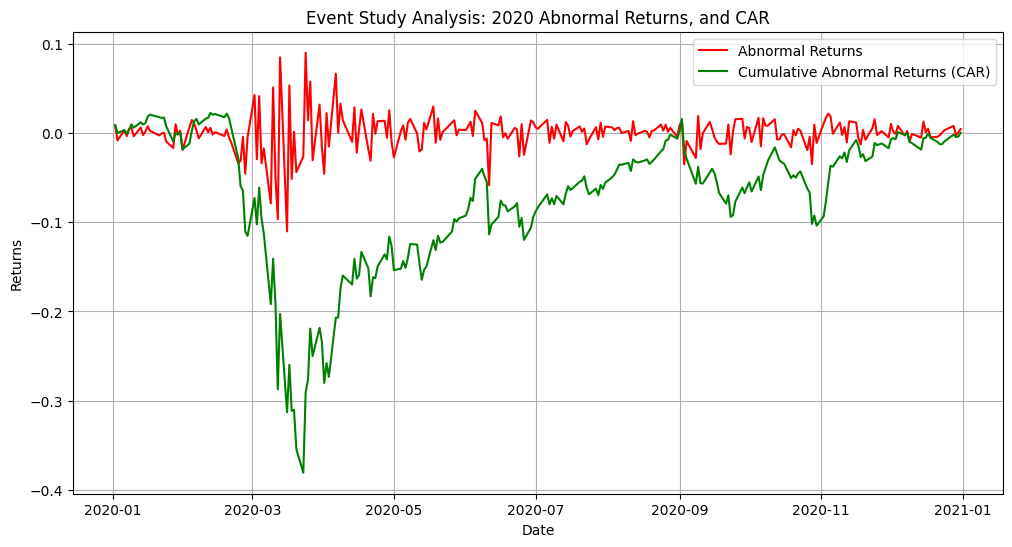

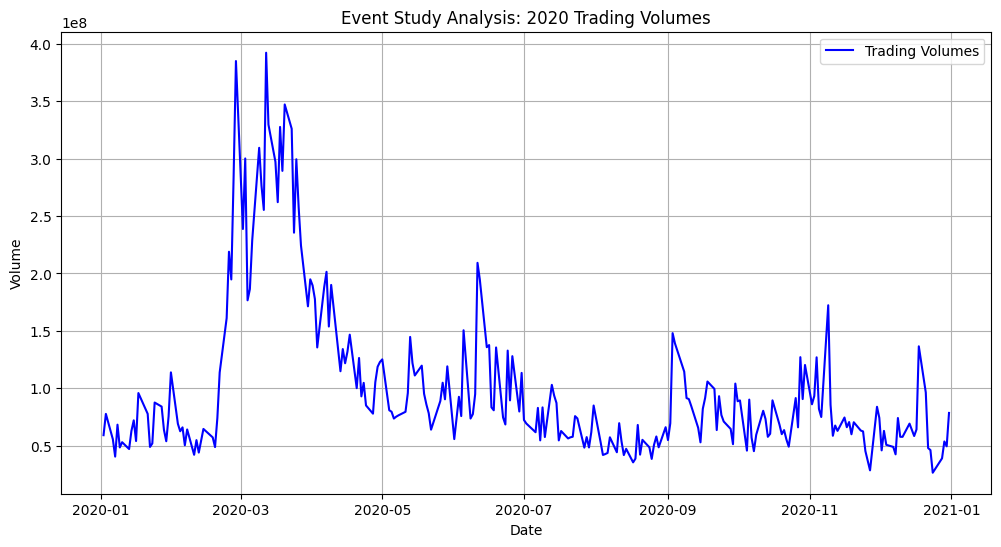

In [ ]:
import matplotlib.pyplot as plt

# Plot market returns, abnormal returns, and cumulative abnormal returns (CAR)
plt.figure(figsize=(12, 6))
plt.plot(event_window_data.index, event_window_data['Abnormal_Returns'], label='Abnormal Returns', color='r')
plt.plot(event_window_data.index, event_window_data['CAR'], label='Cumulative Abnormal Returns (CAR)', color='g')
plt.title('Event Study Analysis: 2020 Abnormal Returns, and CAR')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Plot trading volumes
plt.figure(figsize=(12, 6))
plt.plot(event_window_data.index, event_window_data['Volume'], label='Trading Volumes', color='b')
plt.title('Event Study Analysis: 2020 Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()
